In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [3]:
#f = xr.open_dataset('atn_deployment.nc')
#f = xr.open_dataset('dt_CREMP_Rev_OBIS_Occurrence_v2_3_1_2007_943b_fba4_b799.nc')
f = xr.open_dataset('atn_NCEI_test_deployment.nc')

In [19]:
f

<xarray.Dataset>
Dimensions:               (obs: 5217)
Coordinates:
    lat                   (obs) float64 59.09 59.09 59.1 ... 59.12 59.12 59.12
    lon                   (obs) float64 -151.7 -151.7 -151.7 ... -151.7 -151.6
    time                  (obs) datetime64[ns] 2019-11-29T15:05:02 ... 2020-0...
    z                     (obs) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Dimensions without coordinates: obs
Data variables:
    crs                   int32 -2147483647
    ellipse_orientation   (obs) float64 nan nan nan nan ... 80.0 76.0 81.0 77.0
    error_radius          (obs) float64 nan nan nan nan ... 621.0 532.0 417.0
    instrument_location   <U1 ''
    instrument_pressure   <U1 ''
    instrument_tag        <U1 ''
    location_class        (obs) object 'G' 'G' 'G' 'G' 'G' ... '1' 'B' 'B' '2'
    offset                (obs) float64 nan nan nan nan nan ... nan nan nan nan
    offset_orientation    (obs) float64 nan nan nan nan nan ... nan nan nan nan
    platform              <U1 ''
    qartod_location_flag  object nan
    qartod_rollup_flag2   object nan
    qartod_speed_flag     object nan
    qartod_time_flag      object nan
    semi_major_axis       (obs) float64 nan nan nan ... 5.167e+03 761.0
    semi_minor_axis       (obs) float64 nan nan nan nan ... 140.0 54.0 228.0
Attributes:
    date_created:                    2020-04-27T16:04:41Z
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    geospatial_bounds_vertical_crs:  EPSG:4326
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    geospatial_vertical_positive:    down
    naming_authority:                gov.noaa.ioos.atn
    publisher_email:                 atndata@ioos.us
    publisher_name:                  IOOS ATN
    publisher_url:                   https://atn.ioos.us
    source:                          Service Argos
    standard_name_vocabulary:        CF-v58
    geospatial_bbox:                 POLYGON ((250.83 50.6209, 250.83 66.8306...
    geospatial_bounds:               POLYGON ((159.0115000000001 50.6209, 209...
    geospatial_bounds_crs:           EPSG:4326
    geospatial_vertical_units:       m
    time_coverage_start:             2019-11-29T15:05:02Z
    time_coverage_end:               2020-04-27T08:29:22Z
    time_coverage_duration:          P149DT17H24M20S
    time_coverage_resolution:        P0DT0H42M21S
    date_issued:                     2020-04-27T16:04:41Z
    date_modified:                   2020-04-27T16:04:41Z
    argos_program_number:            11691
    creator_email:                   michael.rehberg@alaska.gov
    first_uplink_date:               1575510820
    id:                              5deb0b1d6321be14905284b8
    last_uplink_date:                1587997825
    ptt:                             180473
    last_location_lat:               59.1356
    last_location_lon:               -151.4463
    last_location_date:              1587997825
    Conventions:                     CF-1.6, ACDD-1.3
    acknowledgement:                 NOAA IOOS, Axiom Data Science, Navy ONR,...
    creator_name:                    Michael Rehberg
    creator_url:                     https://www.adfg.alaska.gov/index.cfm?ad...
    infoUrl:                         https://dev.axiomdatascience.com/?portal...
    institution:                     Alaska Department of Fish and Game
    keywords:                        atn,ioos,trajectory, steller sea lion
    license:                         This animal telemery deployment data fro...
    metadata_link:                   https://www.somelinkwhenwehaveacollectio...
    processing_level:                ATN DAC level 1 data prodcut [data level...
    project:                         Habitat Use of Adult Female Steller Sea ...
    geospatial_lat_min:              50.6209
    geospatial_lat_max:              66.8307
    geospatial_lon_min:              -154.258
    geospatial_lon_max:              160

In [4]:
print('\033[4m'+'Global Attributes:'+'\033[0m')
for key in f.attrs:
    print("%s = %s" % (key, f.attrs[key]))
print('\033[4m'+'\nVariable Attributes:'+'\033[0m')
for var in f.variables:
    print('\033[1m'+var+'\033[0m')
    for key in f.variables[var].attrs:
        print('\t%s = %s' % (key,f.variables[var].attrs[key]))
    #f.variables['time'].attrs

Global Attributes:
date_created = 2020-04-27T16:04:41Z
featureType = trajectory
cdm_data_type = Trajectory
geospatial_bounds_vertical_crs = EPSG:4326
geospatial_lat_units = degrees_north
geospatial_lon_units = degrees_east
geospatial_vertical_positive = down
naming_authority = gov.noaa.ioos.atn
publisher_email = atndata@ioos.us
publisher_name = IOOS ATN
publisher_url = https://atn.ioos.us
source = Service Argos
standard_name_vocabulary = CF-v58
geospatial_bbox = POLYGON ((250.83 50.6209, 250.83 66.83069999999999, 159.0115000000001 66.83069999999999, 159.0115000000001 50.6209, 250.83 50.6209))
geospatial_bounds = POLYGON ((159.0115000000001 50.6209, 209.0858 59.7264, 250.83 66.83069999999999, 208.0173 58.7985, 160.9647 50.8049, 159.0115000000001 50.6209))
geospatial_bounds_crs = EPSG:4326
geospatial_vertical_units = m
time_coverage_start = 2019-11-29T15:05:02Z
time_coverage_end = 2020-04-27T08:29:22Z
time_coverage_duration = P149DT17H24M20S
time_coverage_resolution = P0DT0H42M21S
date_i

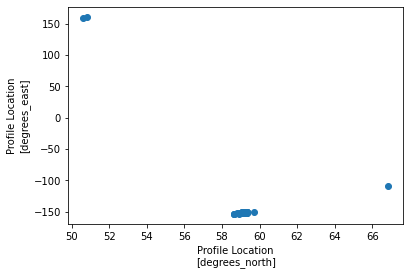

In [5]:
f.plot.scatter('lat','lon')

In [6]:
import folium
from folium.plugins import Fullscreen

map = folium.Map(location=[f.lat.mean(), f.lon.mean()], zoom_start=1)
Fullscreen().add_to(map)

for i in range(0,len(f.lat.data)):
    folium.Circle(
        location=[f.lat.data[i],f.lon.data[i]],
        radius = 5,
        popup = f.platform.species,
    ).add_to(map)
map

In [7]:
from folium.plugins import HeatMapWithTime
from folium.plugins import Fullscreen

map1 = folium.Map(location=[f.lat.mean(), f.lon.mean()], zoom_start=1)
Fullscreen().add_to(map1)

HeatMapWithTime([f.lat.data,f.lon.data],radius=5,auto_play=True,position='bottomright').add_to(map1)

map1

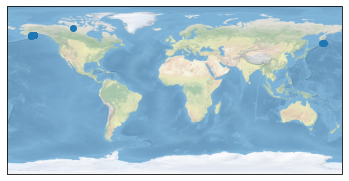

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

f.plot.scatter(x='lon',y='lat')

## Attempt to animate tracks
uses code from https://nbviewer.jupyter.org/github/ocefpaf/notebooks_demos/blob/HS20/notebooks/2020-11-18-Hurricane_Season-2020.ipynb

In [9]:
import pandas as pd
gliders = f.to_dataframe()
gliders['time']=pd.to_datetime(gliders['time'])
gliders = gliders.set_index('time')
gliders

crs  ellipse_orientation  error_radius  \
time                                                                 
2019-11-29 15:05:02 -2147483647                  NaN           NaN   
2019-11-29 15:49:56 -2147483647                  NaN           NaN   
2019-11-29 17:06:28 -2147483647                  NaN           NaN   
2019-11-29 22:58:25 -2147483647                  NaN           NaN   
2019-11-29 23:44:06 -2147483647                  NaN           NaN   
...                         ...                  ...           ...   
2020-04-27 06:41:39 -2147483647                 83.0        1748.0   
2020-04-27 07:35:33 -2147483647                 80.0         633.0   
2020-04-27 07:36:32 -2147483647                 76.0         621.0   
2020-04-27 08:03:28 -2147483647                 81.0         532.0   
2020-04-27 08:29:22 -2147483647                 77.0         417.0   

                    instrument_location instrument_pressure instrument_tag  \
time                                                                         
2019-11-29 15:05:02                                                          
2019-11-29 15:49:56                                                          
2019-11-29 17:06:28                                                          
2019-11-29 22:58:25                                                          
2019-11-29 23:44:06                                                          
...                                 ...                 ...            ...   
2020-04-27 06:41:39                                                          
2020-04-27 07:35:33                                                          
2020-04-27 07:36:32                                                          
2020-04-27 08:03:28                                                          
2020-04-27 08:29:22                                                          

                         lat location_class       lon  offset  \
time                                                            
2019-11-29 15:05:02  59.0913              G -151.6675     NaN   
2019-11-29 15:49:56  59.0941              G -151.6656     NaN   
2019-11-29 17:06:28  59.0955              G -151.6647     NaN   
2019-11-29 22:58:25  59.0995              G -151.6846     NaN   
2019-11-29 23:44:06  59.1000              G -151.6843     NaN   
...                      ...            ...       ...     ...   
2020-04-27 06:41:39  59.1261              0 -151.5863     NaN   
2020-04-27 07:35:33  59.1231              1 -151.6500     NaN   
2020-04-27 07:36:32  59.1230              B -151.6499     NaN   
2020-04-27 08:03:28  59.1195              B -151.6588     NaN   
2020-04-27 08:29:22  59.1241              2 -151.6258     NaN   

                     offset_orientation platform qartod_location_flag  \
time                                                                    
2019-11-29 15:05:02                 NaN                           NaN   
2019-11-29 15:49:56                 NaN                           NaN   
2019-11-29 17:06:28                 NaN                           NaN   
2019-11-29 22:58:25                 NaN                           NaN   
2019-11-29 23:44:06                 NaN                           NaN   
...                                 ...      ...                  ...   
2020-04-27 06:41:39                 NaN                           NaN   
2020-04-27 07:35:33                 NaN                           NaN   
2020-04-27 07:36:32                 NaN                           NaN   
2020-04-27 08:03:28                 NaN                           NaN   
2020-04-27 08:29:22                 NaN                           NaN   

                    qartod_rollup_flag2 qartod_speed_flag qartod_time_flag  \
time                                                                         
2019-11-29 15:05:02                 NaN               NaN              NaN   
2019-11-29 15:49:56                 NaN               NaN              N

In [46]:
min_lon, max_lon, min_lat, max_lat = bbox  = -155, -150, 58, 60#
#min_lon, max_lon, min_lat, max_lat = bbox  = f.lon.min(), f.lon.max(), f.lat.min(), f.lat.max()
min_time = pd.to_datetime(f.time.min().values)
max_time = pd.to_datetime(f.time.max().values)

In [47]:
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_path = Path.home().joinpath("cartopy_stockimages")

def make_map(figsize=(12, 12), projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(
        subplot_kw={"projection": projection},
        figsize=figsize,
    )
    ax.set_extent(bbox)
    ax.coastlines()
    fname = image_path.joinpath("HYP_LR_SR_OB_DR.tif")
    ax.imshow(imread(fname), origin="upper", transform=projection, extent=[-180, 180, -90, 90])
    return fig, ax

In [48]:
# We will interpolate all data to 6 hours interval
# glider data is approximately a few minutes while track data is every 6 hours
# new_index = pd.date_range(min_time, max_time, freq="6h")


# def reindex_and_interpolate(df, new_index):
#     return df.reindex(df.index | new_index).interpolate(method="pad", limit_direction="forward", limit=1).loc[new_index]


# inter_gliders = {}
# for glider, df in gliders.items():
#     # Some delayed gliders have duplicated index.
#     df = df.drop_duplicates()
#     df = reindex_and_interpolate(df, new_index)
#     inter_gliders.update({glider: df})

inter_gliders = gliders

C:\Users\Mathew.Biddle\programs\Anaconda3\envs\IOOS\lib\site-packages\PIL\Image.py:2847: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


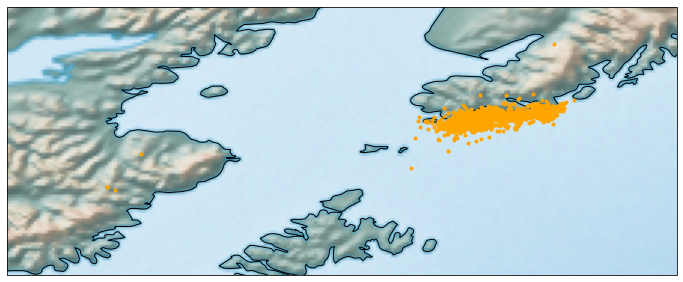

In [49]:
fig, ax = make_map()

ax.plot(inter_gliders["lon"], inter_gliders["lat"], color='orange', linestyle="none", marker=".")

In [50]:
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap


fig, ax = make_map()

title = ax.text(
    0.5, 1.05, "",
    bbox={"facecolor": "w", "alpha": 0.5, "pad":5},
    transform=ax.transAxes, ha="center"
)

# lines = []
# for track in inter_tracks.keys():
#     line, = ax.plot([], [], color=colors[1], marker=".", linestyle="-")
#     lines.append(line)



def init():
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)
    return title,


intensity_glider = []
x_glider, y_glider = [], []
#cmap_glider = make_colors(colors[0])
scatter_glider = ax.scatter([], [], s=10, c=[], vmin=0, vmax=1)
def update_glider(k):
    global scatter_glider, intensity_glider, x_glider, y_glider
    x, y = [], []
    df = inter_gliders
    #for glider, df in inter_gliders.items():
    #print(glider)
    #print(df)
    point = df.iloc[k]
    #print(point)
    x.append(point["lon"])
    y.append(point["lat"])
    x_glider.extend(x)
    y_glider.extend(y)
    arr = np.c_[x_glider, y_glider]
    scatter_glider.set_offsets(arr)
    intensity_glider = np.concatenate((np.array(intensity_glider)*0.80, np.ones(len(x))))
    scatter_glider.set_array(intensity_glider)
    return scatter_glider,

def update(k):
    update_glider(k)
    title.set_text(inter_gliders.index[k])
    return title,


anim = FuncAnimation(fig, update, init_func=init, frames=len(inter_gliders.index), blit=True);
plt.close()  # remove the extra frame output.

C:\Users\Mathew.Biddle\programs\Anaconda3\envs\IOOS\lib\site-packages\PIL\Image.py:2847: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [51]:
HTML(anim.to_html5_video())

KeyboardInterrupt: 